# US Housing/Rent Analysis: Zillow + ArcGIS API for Python)

In [37]:
import os
from dotenv import load_dotenv

load_dotenv()

# Set ArcGIS credentials, if applicable
#  Either replace these variables here if only running locally or
#  set in local .env file
ARCGIS_USERNAME = os.environ['ARCGIS_USERNAME'] # Username for acount
ARCGIS_PASSWORD = os.environ['ARCGIS_PASSWORD'] # Password for account
ARCGIS_APP_CLIENT_ID = os.environ['ARCGIS_APP_CLIENT_ID'] # Client ID for OAuth
ARCGIS_APP_CLIENT_SECRET = os.environ['ARCGIS_APP_CLIENT_SECRET'] # Client Secret for OAuth

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

After importing initial packages, we'll start by looking at ZORI (Zillow Observed Rent Index). See [this Zillow documentation](https://www.zillow.com/research/methodology-zori-repeat-rent-27092/) for the methodology behind this index. 

Note - Unless otherwise specified the property and market data files are downloaded from [Zillow Research](https://www.zillow.com/research/data/). 

In [39]:
zori_df = pd.read_csv('raw_data\Metro_ZORI_AllHomesPlusMultifamily_SSA.csv')
zori_df.head()

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,102001,United States,0,1318.0,1324,1329.0,1334,1340,1345,1351,...,1723,1741,1761,1782,1803,1824,1845.0,1867.0,1889,1911
1,394913,"New York, NY",1,4684.0,4705,4725.0,4746,4767,4787,4808,...,5214,5255,5310,5366,5421,5481,5541.0,5601.0,5664,5728
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1750.0,1761,1771.0,1782,1792,1803,1813,...,2423,2443,2468,2492,2516,2541,2566.0,2592.0,2618,2644
3,394463,"Chicago, IL",3,1405.0,1409,1413.0,1416,1420,1423,1427,...,1634,1644,1656,1668,1680,1692,1705.0,1717.0,1731,1744
4,394514,"Dallas-Fort Worth, TX",4,1128.0,1131,1135.0,1138,1142,1146,1149,...,1517,1536,1557,1578,1599,1621,1643.0,1665.0,1688,1710


In [40]:
zori_df.columns

Index(['RegionID', 'RegionName', 'SizeRank', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
       '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03',
       '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09',
       '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03',
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
       '2020-04', '2020-05', '2020-06', '2020-

In [41]:
id_vars = list(zori_df.columns[:3])
value_vars = list(zori_df.columns)[3:]

The downloaded format is useful for other things, but for now let's melt our df so that each row is an observation, and each column a variable..

In [42]:
zori_df = pd.melt(zori_df, id_vars=id_vars, value_vars=value_vars, var_name='YearMonth', value_name='ZORI')
zori_df.head()

,RegionID,RegionName,SizeRank,YearMonth,ZORI
0,102001,United States,0,2014-01,1318.0
1,394913,"New York, NY",1,2014-01,4684.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,2014-01,1750.0
3,394463,"Chicago, IL",3,2014-01,1405.0
4,394514,"Dallas-Fort Worth, TX",4,2014-01,1128.0


OK yup, 뭔가 되게 시원한 느낌이네 ^^

So now it's really easy to check filter, check different aggregation stats, etc.
e.g...

In [43]:
ny_dec2021 = zori_df.loc[(zori_df['RegionName'].str.contains('NY')) & (zori_df['YearMonth']=='2021-12')]
print(f"Dec 2021 mean ZORI for NY cities ({', '.join(ny_dec2021['RegionName'].unique())}):\n{ny_dec2021['ZORI'].mean()}")

Dec 2021 mean ZORI for NY cities (New York, NY, Buffalo, NY, Rochester, NY, Albany, NY, Syracuse, NY):
2184.4


In [44]:
print(f"btw, without NYC: {ny_dec2021.loc[ny_dec2021['RegionName'] != 'New York, NY']['ZORI'].mean()}")

btw, without NYC: 1298.5


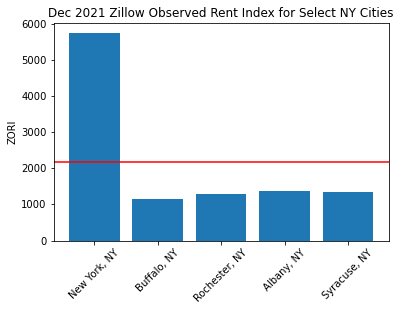

In [45]:
x = 'RegionName'
y = 'ZORI'
plt.bar(x=x, height=y, data=ny_dec2021)
plt.axhline(y=ny_dec2021[y].mean(), color='r', linestyle='-')
plt.xticks(rotation=45)
plt.ylabel('ZORI')
plt.title('Dec 2021 Zillow Observed Rent Index for Select NY Cities')
plt.show()

## Bring in ArcGIS for geos

If using an ArcGIS Developer account and have (or can create) an application that uses OAuth 2.0 credentials to access ArcGIS services. This is needed to access certain content, such as the ZIP code boundaries layer below.

In [46]:
from arcgis.gis import GIS

In [47]:
# Authentication - Anonymous user
gis = GIS()
print(f'Logged in as anonymous user to {gis.properties.portalName}')

Logged in as anonymous user to ArcGIS Online


In [48]:
# Authentication - OAuth
# client_gis = GIS(client_id=ARCGIS_APP_CLIENT_ID)

In [49]:
# Authentication - Logging in as user
# my_gis = GIS(
#     username=ARCGIS_USERNAME,
#     password=ARCGIS_PASSWORD
# )
# print(f'Logged in as: {my_gis.properties.user.username}')

In [50]:
items = gis.content.search(
    query='United States ZIP Code Boundaries owner: esri_dm',
    item_type='Feature Layer',
    max_items=15)
from IPython.display import display

for item in items:
    display(item)

<Item title:"USA ZIP Code Areas" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States ZIP Code Boundaries 2017" type:Feature Layer Collection owner:esri_dm>

<Item title:"USA ZIP Codes (2015)" type:Feature Layer Collection owner:esri_dm>

<Item title:"USA ZIP Codes (2014)" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States County Boundaries 2018" type:Feature Layer Collection owner:esri_dm>

<Item title:"USA ZIP Codes (2016)" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States State Boundaries 2018" type:Feature Layer Collection owner:esri_dm>

<Item title:"USA ZIP Codes (2013)" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States County Boundaries 2015" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States State Boundaries 2015" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States Tract Boundaries 2015" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States Tract Boundaries 2017" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States Country Boundary 2020" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States ZIP Code Boundaries 2015" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States Block Group Boundaries 2017" type:Feature Layer Collection owner:esri_dm>

In [51]:
# See https://developers.arcgis.com/documentation/mapping-apis-and-services/security/application-credentials/
import requests

client_credentials = {
    'client_id': ARCGIS_APP_CLIENT_ID, # Set at top of notebook
    'client_secret': ARCGIS_APP_CLIENT_SECRET, # Set at top of notebook
    'grant_type': 'client_credentials'
}

def get_token():
    params = client_credentials
    request = requests.get('https://www.arcgis.com/sharing/rest/oauth2/token',
                          params=params)
    response = request.json()
    token = response['access_token']
    return token
token = get_token()

In [53]:
import pprint

url = 'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Boundaries_2020/FeatureServer'
params = {
    'f': 'json',
    'token': token
}
data = requests.get(url, params=params)
# pprint.pprint(data.json())